In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")


In [6]:
adult_data=pd.read_csv("adult_dataset.csv")



In [7]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
adult_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [9]:
df1=adult_data[adult_data.workclass=="?"]

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1836 entries, 0 to 32544
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             1836 non-null   int64 
 1   workclass       1836 non-null   object
 2   fnlwgt          1836 non-null   int64 
 3   education       1836 non-null   object
 4   education.num   1836 non-null   int64 
 5   marital.status  1836 non-null   object
 6   occupation      1836 non-null   object
 7   relationship    1836 non-null   object
 8   race            1836 non-null   object
 9   sex             1836 non-null   object
 10  capital.gain    1836 non-null   int64 
 11  capital.loss    1836 non-null   int64 
 12  hours.per.week  1836 non-null   int64 
 13  native.country  1836 non-null   object
 14  income          1836 non-null   object
dtypes: int64(6), object(9)
memory usage: 229.5+ KB


In [11]:
adult_data=adult_data[adult_data["workclass"]!="?"]

In [12]:
adult_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [13]:
df_categorical=adult_data.select_dtypes(include=["object"])
df_categorical.apply(lambda x:x=="?",axis=0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [14]:
adult_data=adult_data[adult_data["native.country"]!="?"]
adult_data=adult_data[adult_data["occupation"]!="?"]

In [15]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [16]:
from sklearn import preprocessing
df_categorical=adult_data.select_dtypes(include=["object"])
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [17]:
le=preprocessing.LabelEncoder()
df_categorical=df_categorical.apply(le.fit_transform)
df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [18]:
adult_data=adult_data.drop(df_categorical,axis=1)
adult_data=pd.concat([adult_data,df_categorical],axis=1)
adult_data.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [19]:
adult_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             30162 non-null  int64
 1   fnlwgt          30162 non-null  int64
 2   education.num   30162 non-null  int64
 3   capital.gain    30162 non-null  int64
 4   capital.loss    30162 non-null  int64
 5   hours.per.week  30162 non-null  int64
 6   workclass       30162 non-null  int64
 7   education       30162 non-null  int64
 8   marital.status  30162 non-null  int64
 9   occupation      30162 non-null  int64
 10  relationship    30162 non-null  int64
 11  race            30162 non-null  int64
 12  sex             30162 non-null  int64
 13  native.country  30162 non-null  int64
 14  income          30162 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [20]:
adult_data["income"]=adult_data["income"].astype("category")

In [21]:
y=adult_data["income"]
x=adult_data.drop("income",axis=1)

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=99)

In [23]:
x_train.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
24351,42,289636,9,0,0,46,2,11,2,13,0,4,1,38
15626,37,52465,9,0,0,40,1,11,4,7,1,4,1,38
4347,38,125933,14,0,0,40,0,12,2,9,0,4,1,19
23972,44,183829,13,0,0,38,5,9,4,0,1,4,0,38
26843,35,198841,11,0,0,35,2,8,0,12,3,4,1,38


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt_default=DecisionTreeClassifier()
dt_default.fit(x_train,y_train)


DecisionTreeClassifier()

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
y_pred=dt_default.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.87      0.87      6867
           1       0.59      0.62      0.61      2182

    accuracy                           0.81      9049
   macro avg       0.74      0.74      0.74      9049
weighted avg       0.81      0.81      0.81      9049



In [26]:
print(confusion_matrix(y_test,y_pred))
print("accuracy=",accuracy_score(y_test,y_pred))

[[5940  927]
 [ 822 1360]]
accuracy= 0.8067189744723173


In [ ]:
#Hyper parameter tunning

In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


In [38]:
n_folds=5
parameters={"max_depth":range(1,40)}
dtree=DecisionTreeClassifier(criterion="gini",random_state=100)

tree=GridSearchCV(dtree,
                  parameters,
                  cv=n_folds,
                  scoring="accuracy",return_train_score=True)
tree.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [39]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.014101,0.001829,0.002673,0.000336,1,{'max_depth': 1},0.747810,0.747810,0.747573,0.747750,...,0.747738,0.000087,39,0.747721,0.747721,0.747780,0.747735,0.747735,0.747738,0.000022
1,0.018787,0.000185,0.002518,0.000084,2,{'max_depth': 2},0.812219,0.818612,0.820507,0.825675,...,0.819969,0.004538,16,0.821906,0.820308,0.819834,0.818542,0.819253,0.819969,0.001134
2,0.025299,0.000118,0.002477,0.000029,3,{'max_depth': 3},0.828558,0.834241,0.834478,0.836570,...,0.834273,0.003115,12,0.835998,0.834577,0.834458,0.833758,0.833758,0.834510,0.000819
3,0.031660,0.000127,0.002546,0.000118,4,{'max_depth': 4},0.832583,0.840871,0.842529,0.842729,...,0.840193,0.003860,9,0.841622,0.839491,0.844997,0.838908,0.845421,0.842088,0.002707
4,0.037838,0.000231,0.002643,0.000151,5,{'max_depth': 5},0.834241,0.844897,0.847265,0.842729,...,0.843319,0.004858,7,0.844287,0.844227,0.849319,0.841572,0.849683,0.845818,0.003165


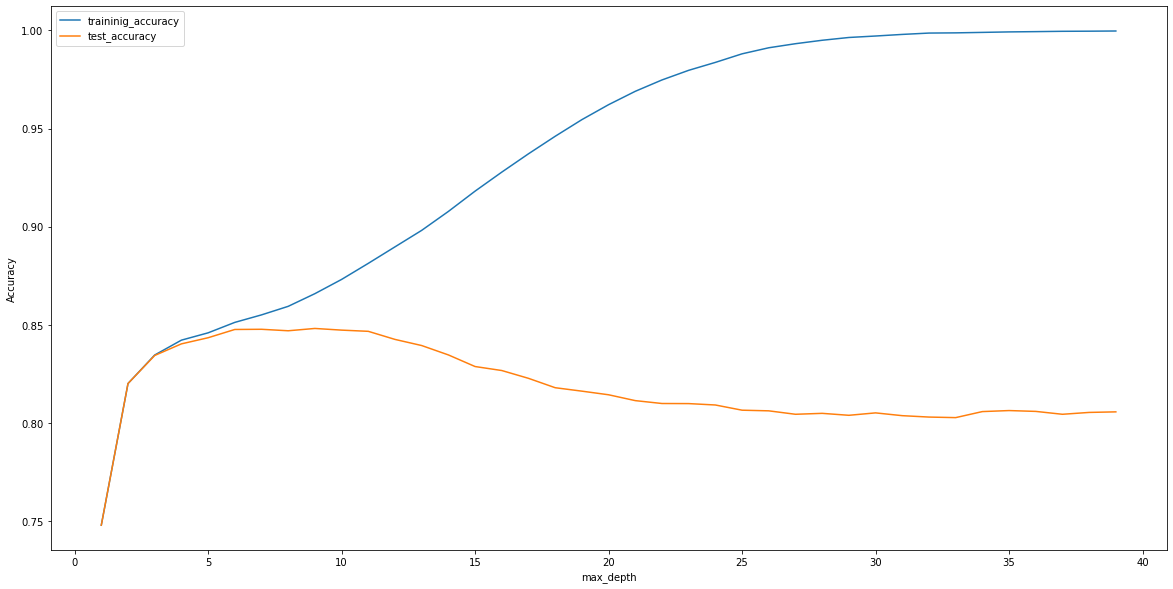

In [40]:
plt.figure(figsize=(20,10))
plt.plot(scores["param_max_depth"],
         scores["mean_train_score"],
        label="traininig_accuracy")
plt.plot(scores["param_max_depth"],
        scores['mean_test_score'],
        label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [42]:
#minin sample leaf
n_folds=5
parameters={"min_samples_leaf":range(5,200,20)}
dtree=DecisionTreeClassifier(criterion="gini",random_state=100)

tree=GridSearchCV(dtree,
                  parameters,
                  cv=n_folds,
                  scoring="accuracy",return_train_score=True)
tree.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [43]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.091744,0.003635,0.003080,0.000026,5,{'min_samples_leaf': 5},0.825716,0.827848,0.819560,0.826149,...,0.823616,0.003696,10,0.915335,0.911782,0.915335,0.912083,0.913149,0.913537,0.001537
1,0.075652,0.000611,0.002972,0.000129,25,{'min_samples_leaf': 25},0.841819,0.851291,0.839451,0.842018,...,0.844788,0.004651,6,0.868028,0.869686,0.871226,0.867503,0.869872,0.869263,0.001343
2,0.072823,0.002231,0.003062,0.000287,45,{'min_samples_leaf': 45},0.843003,0.849159,0.846555,0.851018,...,0.848293,0.003194,1,0.861042,0.860154,0.862581,0.860399,0.863714,0.861578,0.001362
3,0.074787,0.016358,0.002810,0.000019,65,{'min_samples_leaf': 65},0.841108,0.852711,0.845371,0.851492,...,0.845830,0.005589,2,0.857549,0.855773,0.858555,0.855189,0.858149,0.857043,0.001328
4,0.064324,0.002245,0.003026,0.000409,85,{'min_samples_leaf': 85},0.838030,0.849159,0.845371,0.851492,...,0.845214,0.004834,3,0.853108,0.853108,0.855654,0.854005,0.854597,0.854095,0.000963


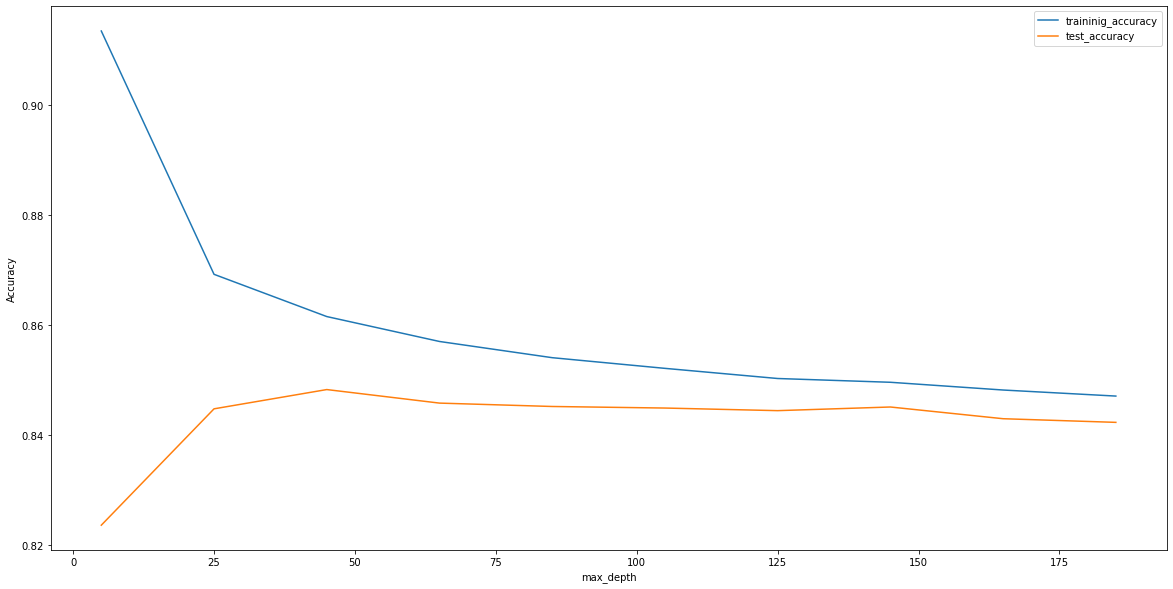

In [45]:
plt.figure(figsize=(20,10))
plt.plot(scores["param_min_samples_leaf"],
         scores["mean_train_score"],
        label="traininig_accuracy")
plt.plot(scores["param_min_samples_leaf"],
        scores['mean_test_score'],
        label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [46]:
#minin sample split
n_folds=5
parameters={"min_samples_split":range(5,200,20)}
dtree=DecisionTreeClassifier(criterion="gini",random_state=100)

tree=GridSearchCV(dtree,
                  parameters,
                  cv=n_folds,
                  scoring="accuracy",return_train_score=True)
tree.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [47]:
scores=tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.105238,0.011972,0.003177,0.000026,5,{'min_samples_split': 5},0.811982,0.811035,0.818376,0.811701,...,0.812296,0.003296,10,0.969094,0.969331,0.969509,0.970458,0.971227,0.969924,0.000800
1,0.105303,0.006981,0.003588,0.000463,25,{'min_samples_split': 25},0.825006,0.825243,0.830215,0.822596,...,0.826126,0.002581,9,0.906927,0.906513,0.906986,0.906577,0.911847,0.907770,0.002047
2,0.105220,0.007159,0.003474,0.000512,45,{'min_samples_split': 45},0.835188,0.839687,0.830215,0.827333,...,0.834225,0.004783,8,0.890527,0.890053,0.889816,0.888521,0.896335,0.891051,0.002725
3,0.107671,0.015154,0.003732,0.000914,65,{'min_samples_split': 65},0.839451,0.845844,0.837556,0.833728,...,0.840098,0.004360,7,0.883896,0.882238,0.883245,0.880765,0.884258,0.882880,0.001261
4,0.093464,0.001917,0.003134,0.000149,85,{'min_samples_split': 85},0.846081,0.853895,0.838977,0.837281,...,0.844314,0.005898,6,0.877383,0.877442,0.879515,0.875081,0.880706,0.878025,0.001940


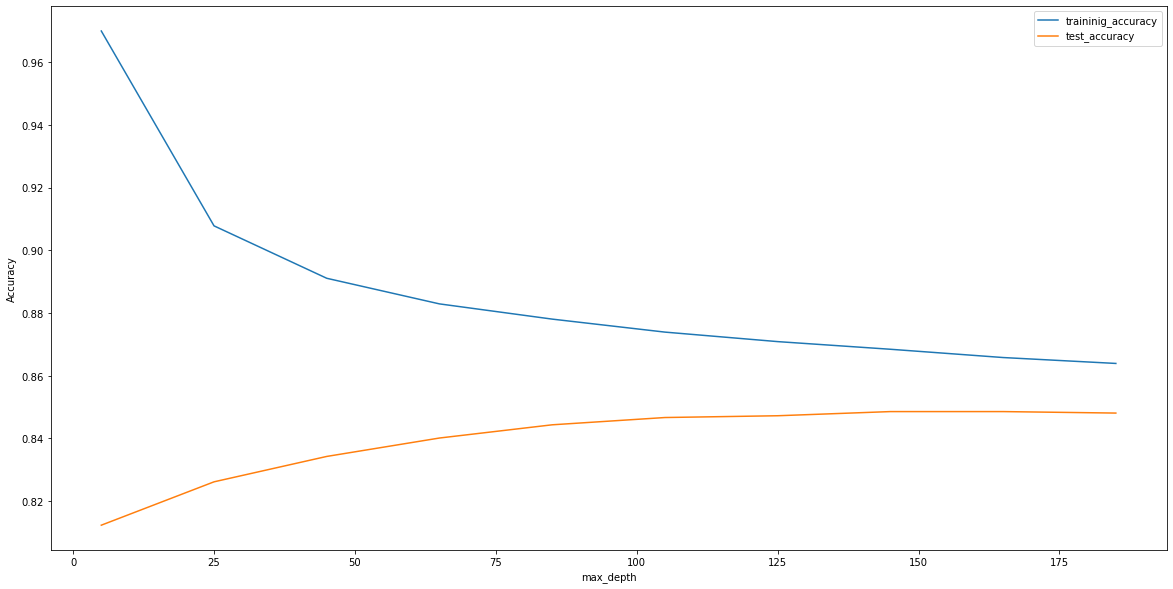

In [49]:
plt.figure(figsize=(20,10))
plt.plot(scores["param_min_samples_split"],
         scores["mean_train_score"],
        label="traininig_accuracy")
plt.plot(scores["param_min_samples_split"],
        scores['mean_test_score'],
        label="test_accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [57]:
param_grid={
    'max_depth':range(5,15,5),
    'min_samples_leaf':range(50,150,50),
    'min_samples_split':range(50,150,50),
    'criterion':["entropy","gini"]
}


In [58]:
n_folds=5
dtree=DecisionTreeClassifier()

In [59]:
grid_search=GridSearchCV(estimator=dtree,param_grid=param_grid,cv=n_folds,verbose=1)

In [60]:
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [61]:
cv_results=pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.045408,0.004967,0.003189,0.000820,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
1,0.040256,0.000128,0.002599,0.000059,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.843950,0.840398,0.845097,0.845334,0.841804,0.004173,13
2,0.040325,0.000656,0.002611,0.000109,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
3,0.040030,0.000178,0.002556,0.000038,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834241,0.842529,0.840398,0.845097,0.845808,0.841615,0.004157,15
4,0.066453,0.001706,0.002801,0.000071,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
5,0.065944,0.001016,0.002789,0.000046,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.842529,0.851527,0.847265,0.854334,0.853861,0.849903,0.004456,3
6,0.061881,0.000563,0.002936,0.000317,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
7,0.062309,0.001351,0.002771,0.000037,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.845134,0.852475,0.847502,0.854098,0.845571,0.848956,0.003661,5
8,0.036982,0.000221,0.002564,0.000052,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9
9,0.037446,0.000737,0.002551,0.000033,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.834241,0.844897,0.847502,0.845097,0.847466,0.843841,0.004927,9


In [67]:
print("best accuracy",grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8510400232064759
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [64]:
clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,
                              max_depth=10,min_samples_leaf=50,
                              min_samples_split=50)

In [65]:
clf_gini.fit(x_test,y_test)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [73]:
y_pred=clf_gini.predict(x_test)

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6867
           1       0.80      0.54      0.64      2182

    accuracy                           0.86      9049
   macro avg       0.83      0.75      0.78      9049
weighted avg       0.85      0.86      0.84      9049



In [72]:
print(confusion_matrix(y_test,y_pred))

[[6565  302]
 [1007 1175]]
